# Scikit-Learn 의 의사결정 나무 클래스

Scikit-Learn에서 의사 결정 나무는 DecisionTreeClassifier 클래스로 구현되어있다. 여기에서는 붓꽃 분류 문제를 예롤 들어 의사 결정 나무를 설명한다. 이 예제에서는 독립변수 공간을 공간상에 표시하기 위해 꽃받침의 길이와 폭만을 독립변수로 사용하였다.


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [4]:
from sklearn.tree import DecisionTreeClassifier
# scikit-learn . tree 에서 DecisionTreeClassifier 를 가져온다. 

tree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state = 0).fit(X,y)
# tree1 을 만든다. entropy 계수를 이용하여 
# 분리 변수가 범주형인 경우 적절한 분리기준(카이제곱 통계량의 p값, 지니지수, 엔트로피짓수) 
# 엔트로피 지수 : shannon entropy 라고도 하는데 주어진 집단의 혼잡도(불확실성)을 나타내는 수치다. 


의사결정나무를 시각화 하기 위한 코드
- ``` draw_dicision_tree``` 함수는 의사결정 나무의 의사결정과정의 세부적인 내역을 다이어그램으로 보여주고  ```plot_decision_regions``` 함수는 이런 의사결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화하여 보여준다. 


In [15]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


In [16]:

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


In [24]:


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

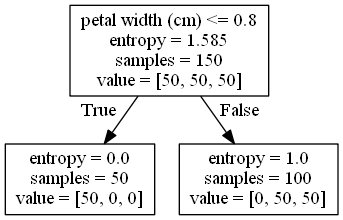

In [18]:
draw_decision_tree(tree1)

In [28]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

NameError: name 'mpl' is not defined

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

In [27]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)


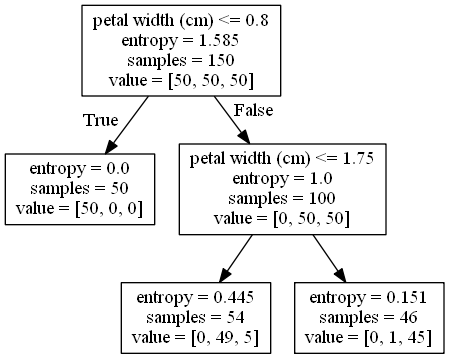

In [22]:
draw_decision_tree(tree2)

In [23]:
plot_decision_regions(X,y,tree2,"Depth 2")
plt.show()

NameError: name 'mpl' is not defined

In [57]:
confusion_matrix(y,tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

In [58]:
tree3 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0).fit(X,y)

In [61]:
draw_decision_tree(tree3)

FileNotFoundError: [WinError 2] "dot.exe" not found in path.